In [6]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
keras.__version__

'2.10.0'

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 生成随机数据
N = 100
X = np.random.random(N) * 6 - 3
y = 2 * X - 1 + np.random.randn(N) * 0.5

# 创建神经网络模型
model = keras.Sequential([
    layers.Input(shape=(1,)),  # 输入层
    layers.Dense(5, activation='linear'),  # 隐藏层1，使用ReLU激活函数
    layers.Dense(1)  # 一个神经元的输出层
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mae')

# 将数据分成训练集和测试集
X_train, y_train = X[:80], y[:80]
X_val, y_val = X[80:], y[80:]


# 打印模型参数
model.summary()

# 训练模型，并同时记录训练集和测试集的损失
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_data=(X_val, y_val))

# 使用模型进行预测
X_test = np.linspace(-3, 3, 100)
y_pred = model.predict(X_test)




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
3/3 [==============================] - 1s 114ms/step - loss: 21.5169 - mae: 4.1147 - val_loss: 18.6919 - val_mae: 3.8208
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 21.3092 - mae: 4.0953 - val_loss: 18.5275 - val_mae: 3.8036
Epoch 3/200
3/3 [==============================] - 0s 20ms/step - loss: 21.1111 - mae: 4.0766 - val_loss: 18.3643 - val_mae: 3.7863
Epoch 4/200
3/3 [==============================] - 0s 23ms/step - loss: 20.9122 - mae: 4.0579 - val_loss: 18.2031 - val_mae: 3.7693
Epoch 5/200
3/3 [==============================] - 0s 26ms/step - loss: 20.7175 - mae: 4.0390 - val_loss: 18.0431 - val_mae: 3.7522
Epoch 6/200
3/3 [==============================] - 0s 27ms/step - loss: 20.5221 - mae: 4.0206 - val_loss: 17.8851 - val_mae: 3.7353
Epoch 7/200
3/3 [==============================] - 0s 19ms/step - loss: 20.3378 - mae: 4.0025 - val_loss: 17.7292 - val_mae: 3.7185
Epoch 8/200
3/3 [==============================] - 0s 18ms/step - loss: 20.

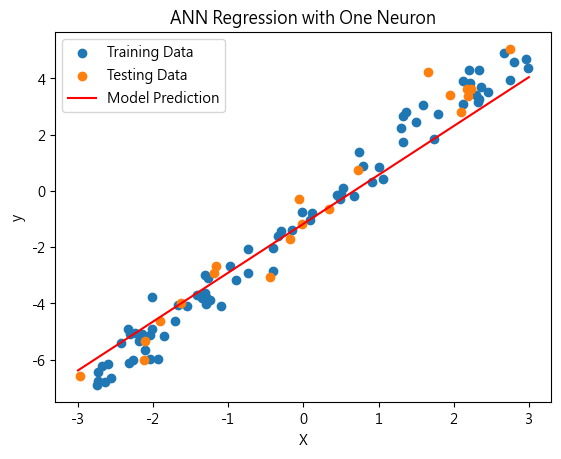

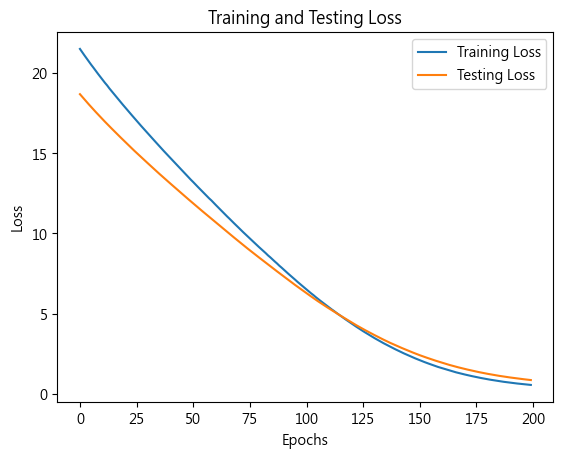

In [8]:
# 绘制原始数据和模型预测结果的图表
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_val, y_val, label='Testing Data')
plt.plot(X_test, y_pred, color='red', label='Model Prediction')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('ANN Regression with One Neuron')

# 绘制训练集和测试集的损失图
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.show()